# Tutorial: Warm and hot start for rapid iterations

In this tutorial you will learn:

 - How to play with model variations
 - Warm start: How UltraNest can resume and reuse an existing run, even if you modify the data/likelihood
 - Hot start: How you can make UltraNest skip ahead to the posterior peak

As a simple example, lets say we want to estimate the mean and standard deviation of a sample of points. Over time, more and more points are added.

## Generate some data

In [1]:
import numpy as np
from numpy import pi, log

np.random.seed(1)
Ndata = 200
mean_true = 42.0
sigma_true = 0.1
y = np.random.normal(mean_true, sigma_true, size=Ndata)


## Visualise the data

Lets plot the data first to see what is going on:



<ErrorbarContainer object of 3 artists>

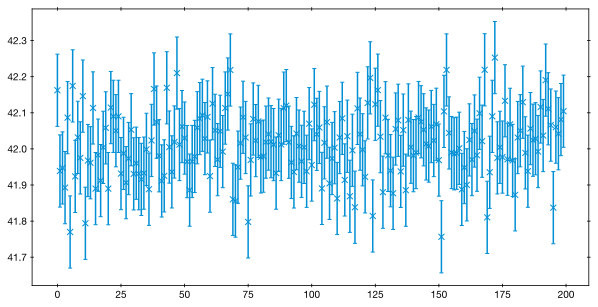

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.errorbar(x=np.arange(Ndata), y=y, yerr=sigma_true, marker='x', ls=' ');

We will ingest the data in chunks, with more and more information becoming available to us. Here are the chunks. We will first analyse the orange ones:

(41.621700406234716, 42.38764838803521)

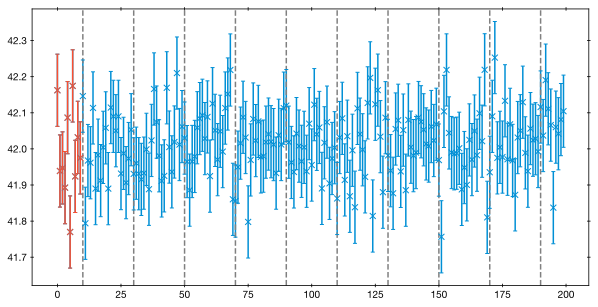

In [3]:
plt.figure(figsize=(10, 5))
plt.errorbar(x=np.arange(Ndata), y=y, yerr=sigma_true, marker='x', ls=' ')
plt.errorbar(x=np.arange(Ndata)[:10], y=y[:10], yerr=sigma_true, marker='x', ls=' ')
ymin, ymax = plt.ylim()
plt.vlines(np.arange(10, Ndata, 20), ymin, ymax, linestyles='--', color='gray')
plt.ylim(ymin, ymax);

## Model setup

In [4]:
from ultranest import ReactiveNestedSampler

parameters = ['mean', 'scatter']

def prior_transform(x):
    z = np.empty_like(x)
    z[0] = x[0] * 2000 - 1000
    z[1] = 10**(x[1] * 4 - 2)
    return z

import scipy.stats
def log_likelihood(params):
    mean, sigma = params
    return scipy.stats.norm(mean, sigma).logpdf(yseen).sum()


## Adding one new chunk at a time, no warm start

In [5]:
reference_results = []

for i in range(10, Ndata, 20):
    print()
    print("Iteration with %d data points" % i)
    yseen = y[:i]
    sampler_ref = ReactiveNestedSampler(parameters, log_likelihood, prior_transform)
    res_ref = sampler_ref.run(min_num_live_points=400, max_num_improvement_loops=0, viz_callback=None, frac_remain=0.5)
    reference_results.append(res_ref)



Iteration with 10 data points


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=7  


[ultranest] Likelihood function evaluations: 9505


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 30 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=3e+01  


[ultranest] Likelihood function evaluations: 10726


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 50 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=5e+01  


[ultranest] Likelihood function evaluations: 10104


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 70 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=6e+01  


[ultranest] Likelihood function evaluations: 10594


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 90 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=9e+01  


[ultranest] Likelihood function evaluations: 10896


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 110 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=1e+02  


[ultranest] Likelihood function evaluations: 10538


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 130 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=1e+02  


[ultranest] Likelihood function evaluations: 10998


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 150 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 10281


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 170 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 10986


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.



Iteration with 190 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 13130


[ultranest] Reached maximum number of improvement loops.


[ultranest] done iterating.


# Warm start

## Adding one data point at a time, with warm start

In [6]:
results = []

yseen = y[:]

# delete any existing content:
ReactiveNestedSampler(parameters, log_likelihood, prior_transform,
                      log_dir='warmstartdoc', resume='overwrite')

for i in range(10, Ndata, 20):
    print()
    print("Iteration with %d data points" % i)
    
    yseen = y[:i]
    sampler = ReactiveNestedSampler(parameters, log_likelihood, prior_transform,
                                    log_dir='warmstartdoc', resume='resume-similar',
                                    warmstart_max_tau=0.5)
    ncall_initial = int(sampler.ncall)
    res = sampler.run(frac_remain=0.5, viz_callback=None)
    results.append((i, res, ncall_initial))




Iteration with 10 data points
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=7  


[ultranest] Likelihood function evaluations: 9128


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = -5.349 +- 0.1328


[ultranest] Effective samples strategy satisfied (ESS = 985.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.17 bs:0.13 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.



Iteration with 30 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52100151 0.28679979] gave 6.805794517062637, now 23.52458241871868


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 3370 stored points


[ultranest] Explored until L=3e+01  


[ultranest] Likelihood function evaluations: 12786


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 12.5 +- 0.1463


[ultranest] Effective samples strategy satisfied (ESS = 980.2, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.18 bs:0.15 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.



Iteration with 50 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.520999   0.25344861] gave 26.19943580622012, now 45.53744605501225


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 3734 stored points


[ultranest] Explored until L=5e+01  


[ultranest] Likelihood function evaluations: 16080


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 31.52 +- 0.1144


[ultranest] Effective samples strategy satisfied (ESS = 985.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.18 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.



Iteration with 70 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.5210041  0.24086227] gave 45.23746579240468, now 64.76480359076285


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 3065 stored points


[ultranest] Explored until L=6e+01  


[ultranest] Likelihood function evaluations: 20929


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 49.76 +- 0.1795


[ultranest] Effective samples strategy satisfied (ESS = 990.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.44, need <0.5)


[ultranest]   logZ error budget: single: 0.19 bs:0.18 tail:0.41 total:0.44 required:<0.50


[ultranest] done iterating.



Iteration with 90 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52099949 0.24568455] gave 64.62963723317351, now 87.15695463690685


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 4332 stored points


[ultranest] Explored until L=9e+01  


[ultranest] Likelihood function evaluations: 24076


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 72.33 +- 0.1315


[ultranest] Effective samples strategy satisfied (ESS = 979.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.19 bs:0.13 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.



Iteration with 110 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52100783 0.24405963] gave 87.03987414426985, now 111.15989853902673


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 4601 stored points


[ultranest] Explored until L=1e+02  


[ultranest] Likelihood function evaluations: 26961


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 96.84 +- 0.1282


[ultranest] Effective samples strategy satisfied (ESS = 975.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.19 bs:0.13 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.



Iteration with 130 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52100609 0.23884523] gave 112.07668850780007, now 126.25384781040142


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 4586 stored points


[ultranest] Explored until L=1e+02  


[ultranest] Likelihood function evaluations: 29837


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 111 +- 0.116


[ultranest] Effective samples strategy satisfied (ESS = 981.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.19 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.



Iteration with 150 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52100298 0.24456083] gave 126.38135001500757, now 150.74739074052763


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 4280 stored points


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 33381


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 135.5 +- 0.1639


[ultranest] Effective samples strategy satisfied (ESS = 973.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.44, need <0.5)


[ultranest]   logZ error budget: single: 0.19 bs:0.16 tail:0.41 total:0.44 required:<0.50


[ultranest] done iterating.



Iteration with 170 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52100307 0.23742605] gave 151.57403017622693, now 166.06058249285357


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 4285 stored points


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 36895


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 150.1 +- 0.1703


[ultranest] Effective samples strategy satisfied (ESS = 985.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.44, need <0.5)


[ultranest]   logZ error budget: single: 0.19 bs:0.17 tail:0.40 total:0.44 required:<0.50


[ultranest] done iterating.



Iteration with 190 data points
[ultranest] Trying to resume from previous run, but likelihood function gives different result: [0.52100092 0.24591897] gave 165.47964843288375, now 186.09789622881556


[ultranest] trying to salvage points from previous, different run ...


[ultranest] Resuming from 4137 stored points


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 40705


[ultranest] Writing samples and results to disk ...


[ultranest] Writing samples and results to disk ... done


[ultranest]   logZ = 171 +- 0.1581


[ultranest] Effective samples strategy satisfied (ESS = 969.2, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.09 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.44, need <0.5)


[ultranest]   logZ error budget: single: 0.20 bs:0.16 tail:0.41 total:0.44 required:<0.50


[ultranest] done iterating.


## Likelihood evaluations saved by warm start

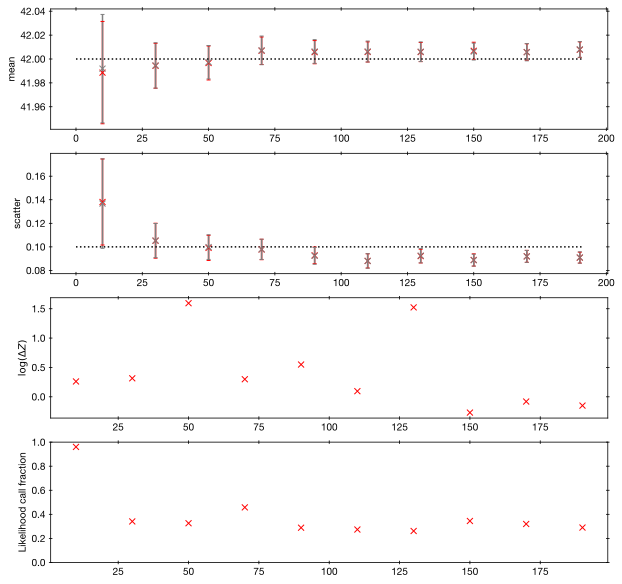

In [7]:
ndim = len(parameters)
plt.figure(figsize=(10, 10))
for (i, res, ncall_initial), res_ref in zip(results, reference_results):
    for j in range(ndim):
        plt.subplot(ndim + 2, 1, 1+j)
        plt.ylabel(parameters[j])
        plt.errorbar(x=i, y=res['samples'][:,j].mean(), yerr=res['samples'][:,j].std(), marker='x', color='r')
        plt.errorbar(x=i, y=res_ref['samples'][:,j].mean(), yerr=res_ref['samples'][:,j].std(), marker='x', color='gray')
    
    plt.subplot(ndim + 2, 1, 1+ndim)
    plt.ylabel('$\log(\Delta Z)$')
    plt.plot(i, res['logz'] - res_ref['logz'], 'x', color='r')
    plt.subplot(ndim + 2, 1, 1+ndim+1)
    plt.ylabel('Likelihood call fraction')
    plt.plot(i, ((res['ncall'] - ncall_initial) / res_ref['ncall']), 'x', color='r')
    plt.ylim(0, 1)

plt.subplot(ndim + 2, 1, 1)
plt.hlines(mean_true, 0, i+1, color='k', linestyles=':')
plt.subplot(ndim + 2, 1, 2)
plt.hlines(sigma_true, 0, i+1, color='k', linestyles=':')


## Take-aways:

Notice the time saving in the bottom panel by more than half. This benefit is *independent of problem dimension*. The cost savings are higher, the more similar the modified problem is.

# Hot start

We may already know roughly what the posterior looks like. If it is roughly gaussian, we can take advantage of this by running UltraNest on an auxiliary distribution.

The speed-up depends on how the auxiliary distribution is defined. Therefore, this is left to the user, and not automatically derived. The following illustrates how to create a auxiliary distribution and work with it.

## Guess a useful covariance

In [8]:
# take result from the second-to-last run
ref_result = reference_results[-2];

Luckily, the posterior here is already very gaussian-like:

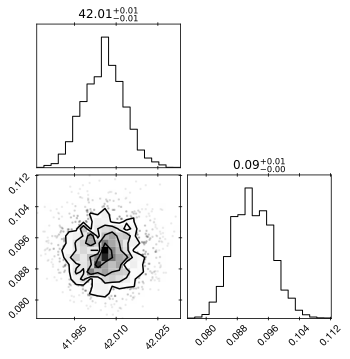

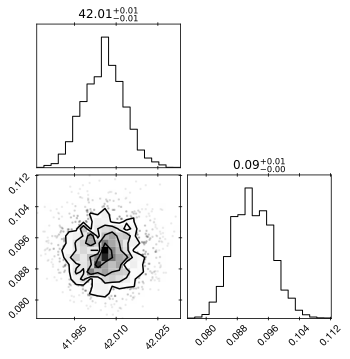

In [9]:
import corner
corner.corner(ref_result['samples'], show_titles=True);

**Step 1**: Identify the center and covariance (in u-space, i.e., before the prior transformation).

You can also do this 

* by looking at the data
* from posterior samples of a previous nested sampling or MCMC run
* with a minimizer such as [snowline](https://johannesbuchner.github.io/snowline/).


We demonstrate the second method here:

In [10]:
indices = np.random.choice(len(ref_result['weighted_samples']['weights']), p=ref_result['weighted_samples']['weights'], size=10000)
u_posterior = ref_result['weighted_samples']['upoints'][indices,:]
ctr = u_posterior.mean(axis=0)
cov = np.cov(u_posterior, rowvar=False)

print("center in unit cube coordinates:", ctr)
print("center in physical coordinates:", prior_transform(ctr))
print("covariance:", cov)

invcov = np.linalg.inv(cov)
print("precision matrix:", invcov)

center in unit cube coordinates: [0.52100278 0.24064225]
center in physical coordinates: [42.00556359  0.09174217]
covariance: [[ 1.31744964e-11 -4.70958530e-10]
 [-4.70958530e-10  3.51887769e-05]]
precision matrix: [[7.59405626e+10 1.01637110e+06]
 [1.01637110e+06 2.84317546e+04]]


Let us intentionally show the case where a poor distribution is chosen:

**Step 2**: Define the auxiliary distribution

This is always the same, once you have chosen a center and covariance.
Here we use a multivariate Student-t distribution with one degree of freedom.

This allows heavier-tailed posterior distributions than a Gaussian,
and is more forgiving if we mis-estimated the center or the covariance.

In [11]:
from ultranest.hotstart import get_extended_auxiliary_problem

aux_log_likelihood, aux_transform = get_extended_auxiliary_problem(
        log_likelihood, prior_transform, ctr, invcov, 
        enlargement_factor=len(parameters)**0.5, df=2)


In [12]:
#aux_parameters = ['aux_%d' % (i + 1) for i, p in enumerate(parameters)]
aux_sampler = ReactiveNestedSampler(
    parameters, aux_log_likelihood, transform=aux_transform,
    derived_param_names=['aux_logweight'],
)
aux_results = aux_sampler.run(frac_remain=0.5, viz_callback=None)

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+02  


[ultranest] Likelihood function evaluations: 1289


[ultranest]   logZ = 188.1 +- 0.03259


[ultranest] Effective samples strategy satisfied (ESS = 886.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.41, need <0.5)


[ultranest]   logZ error budget: single: 0.05 bs:0.03 tail:0.41 total:0.41 required:<0.50


[ultranest] done iterating.


Removed no burn in
Removed no burn in
Removed no burn in


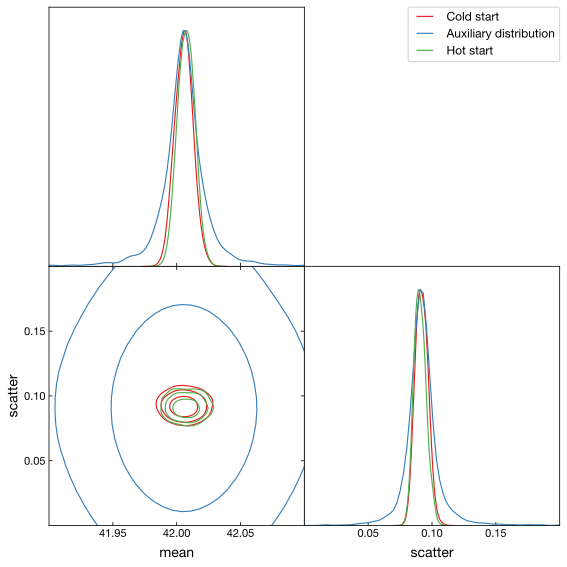

In [13]:
from getdist import MCSamples, plots

aux_dist_samples_full = np.array([aux_transform(np.random.uniform(size=len(parameters))) for i in range(10000)])
aux_dist_samples = aux_dist_samples_full[aux_dist_samples_full[:,-1] > -1e100,:-1]

samples_o = MCSamples(samples=ref_result['samples'],
                       names=ref_result['paramnames'],
                       label='Cold start',
                       settings=dict(smooth_scale_2D=3), sampler='nested')
samples_a = MCSamples(samples=aux_dist_samples,
                       names=ref_result['paramnames'],
                       label='Auxiliary distribution',
                       settings=dict(smooth_scale_2D=1), sampler='nested')
samples_g = MCSamples(samples=aux_results['samples'][:,:-1],
                       names=aux_results['paramnames'][:-1],
                       label='Hot start',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_o, samples_a, samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors,
               param_limits=dict(zip(parameters, [(41.9, 42.1), (0, 0.2)])))



In a good run, most auxiliary weights should be small (<1). If they are not, you may need to increase the enlargement_factor.

Text(0.5, 0, 'ln(weights)')

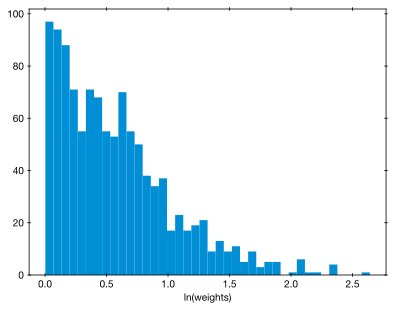

In [14]:
plt.hist(aux_results['samples'][:,-1], bins=40)
plt.xlabel("ln(weights)");

## Speed-up by hot start

Assuming we already obtained the covariance and mean for free, what is the additional cost of the hot start?

In [15]:
print("auxiliary sampler used %(ncall)d likelihood calls" % aux_results)

auxiliary sampler used 1289 likelihood calls


Compare this to the full run with the same number of data points.

In [16]:
print("Speedup factor of hot start: %.1f" % (reference_results[-1]['ncall'] / aux_results['ncall']))

Speedup factor of hot start: 10.2


This speed-up increases drastically if you have highly informative posteriors.

## Conclusion

* Warm start allows accelerated computation based on a different but similar UltraNest run. 
* Hot start allows accelerated computation based on already approximately knowing the posterior peak.

These feature allows you to:

* vary the data (change the analysis pipeline)
* vary model assumptions 

**without needing to start the computation from scratch** (potentially costly).

These features are experimental and feedback is appreciated. It is recommended to do a full, clean run to obtain final, reliable results before publication.
